# **DSC1115 Predictive Analytics - Formative Assessment 1**
## **2021025081 DESQUITADO, Yuichi P.**

### Task 1 - Feedforward Neural Network on Tabular Data  
### Dataset: UCI Heart Disease Dataset
### **Goal: *Predict presence of heart disease.***

**Steps:**
* Preprocess the data (normalization, encoding categorical variables).  
* Build a simple MLP using TensorFlow or PyTorch.  
* Use activation functions (ReLU, sigmoid) and experiment with hidden layers.  
* Implement backpropagation and use a suitable loss function (e.g., binary cross-entropy).  
* Evaluate with accuracy, precision, recall.

**Deliverables:**  
* Python notebooks (.ipynb) with code and markdown explanations.  
* Brief report comparing MLP vs. CNN models, and the effect of transfer learning.

In [175]:
!pip install ucimlrepo      # pip install used to download the dataset needed for the project

# **Initialization**  

The following modules are imported to the project.  
* **pandas** - For dataframe  
* **numpy** - Linear algebra  
* **matplotlib** - Visual plotting  
* **tensorflow** - Model  
* **sklearn** - Metrics, Train-Test Split, Regularization  
* **ucimlrepo** - Dataset from UCI Heart Disease Dataset  

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.src.metrics.confusion_metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id = 45)
df = pd.DataFrame(data.data.features)
df['target'] = data.data.targets

## **Data Cleaning**

Replaces the `?` value of the dataset to a `NaN` value, then drop the `NaN` values. This also formats the data format into `float`.

In [177]:
df.replace('?',
           np.nan,
           inplace = True)
df.dropna(inplace = True)
df = df.astype(float)

## **Data Splitting**

Splits the data to `X` (features) and `Y` (target).

In [178]:
X = df.drop('target', axis = 1)
Y = df['target']

## **Data Normalization and Standardization**

Normalizes the values of `X` before splitting for `train` and `test`. For this project, we used $20\%$ of the data as `test`.

In [179]:
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 22)

# **Model Building**

This part builds the Tensorflow model using `keras`'s `Sequential()`.

* Input Layer = 16 units, ReLU as activation  
* Hidden Layer 1 = 64 units, ReLU as activation
* Hidden Layer 2 = 32 units, Swish as activation
* Output Layer = 1 unit, Sigmoid as activiation

In [180]:
model = keras.Sequential([
    keras.layers.Dense(16,
                       input_shape = (X_train.shape[1],),
                       activation = 'relu'),
    keras.layers.Dense(64,
                       activation = 'relu'),
    keras.layers.Dense(32,
                       activation = 'swish'),
    keras.layers.Dense(1,
                       activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


For the compiling, we used `binary cross-entropy` for loss function, while `accuracy`, `precision`, and `recall` as metrics.

In [181]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])

This part fits the `train` data and checks it with the `test` data, while showing the necessary details of metrics and predicted value's metrics.

In [182]:
history = model.fit(X_train,
                    Y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_test,
                                       Y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.2144 - loss: 0.3648 - precision_10: 0.4900 - recall_9: 0.9873 - val_accuracy: 0.1667 - val_loss: 0.2884 - val_precision_10: 0.4000 - val_recall_9: 1.0000
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1761 - loss: -0.1476 - precision_10: 0.4947 - recall_9: 1.0000 - val_accuracy: 0.1667 - val_loss: -0.0572 - val_precision_10: 0.4000 - val_recall_9: 1.0000
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1600 - loss: -0.5956 - precision_10: 0.4406 - recall_9: 1.0000 - val_accuracy: 0.1667 - val_loss: -0.6028 - val_precision_10: 0.4000 - val_recall_9: 1.0000
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2181 - loss: -1.6959 - precision_10: 0.4999 - recall_9: 1.0000 - val_accuracy: 0.1667 - val_loss: -1.6556 - val_precision_10: 0.4000 - val_recall_9: 1.0000
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1891 - loss: -3.8541 - precision_10: 0.5047 - recall_

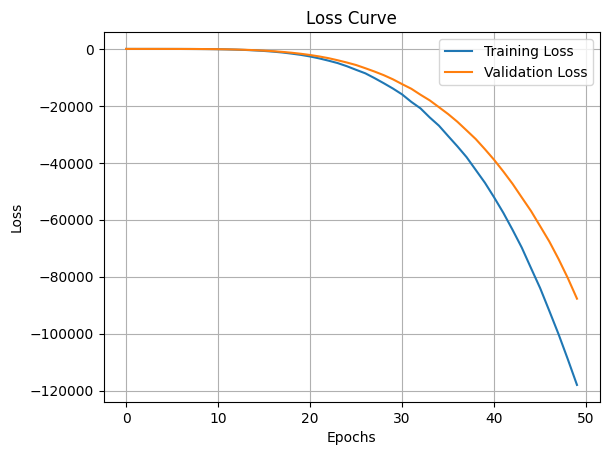

In [183]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

This shows that the models experience and continued decline, impllying the overfitting of the model with the `train` data. Being divergent implies that the model failed to reach an optimal point.

In [184]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(Y_test,
                          Y_pred)
precision = precision_score(Y_test,
                            Y_pred,
                            average = 'macro')
recall = recall_score(Y_test,
                      Y_pred,
                      average = 'macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Accuracy: 0.5333
Precision: 0.2556
Recall: 0.3125


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Accuracy: $53.33\%$** - This indicates that the model was able to predict half of the time.  

## **Precision: $25.56\%$** - This indicates that 1/4 of the predicted positives are true positive, while 3/4 are false positives.

## **Recall: $31.25\%$** - This indicates that out of all the supposed positive values, only 1/3 is correctly labeled as positive, while 2/3 are flagged negative (false negative).

Meanwhile, both are promising models and tools for predictions, MLP are mainly used for tabular predictions, while CNNs will perform best if image input is needed. CNN models can be useful if the basis for prediction will be CAT scans, or cardiograms, etc.

MLP are the best models to use if the data concerns numerical and categorical targets only using alphanumeric values.